## Toyota Used Car Machine Learning Price Prediction

In this notebook, we will be developing a machine learning model from scratch based on the used car data for a particular brand, namely Toyota, present in this dataset. The objective of the model will be to predict the price for a used car based on available features.
    
Steps for implementing a Machine Learning Model:

1. Import required libraries and packages
        Read Dataset
        Examine Feature and Target Variables
2. Performing Encoding on Categorical Feature
        One Hot Encoding
        Label Encoding
3. Splitting Dataset
        Splitting Feature and Target variable
        Splitting Train and Test set
4. Training Model
        Perform Linear Regression
5. Prediction
        Prediction Visualization
        Prediction of Error
        
We will be using the following libraries:

    pandas for data handling
    numpy for numerical operations
    Specific modules from sklearn for model related operations as required
    matplotlib.pyplot and seaborn for data visualization

### Import required libraries and packages

In [151]:
# Import Libraries for Data handling
import pandas as pd

# Import Libraries for Numerical Operations
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

### Read the CSV file using Pandas dataframe

In [152]:
df = pd.read_csv('toyota.csv')

print (type(df))
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,50.4,1.3


#### Feature variables:

model: categories of the ford car

year: the year car was made

transmission: the type of trasmission the car has

mileage: the number of miles the vehicle has driven

fuelType: energy source of the vehicle

mpg: miles per gallon the vehicle can travel

engineSize: Engine size is the volume of fuel and air that can be pushed through a car's cylinders

#### Target Variable:

price: selling price of the car

### Check for data types and any missing values

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


In [154]:
print(df.shape)

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

(6738, 8)
number of rows =  6738
number of columns =  8


### Performing Encoding on Categorical Feature

In [155]:
#figureing out how many unique models 
display(df['model'].unique())
display(df['model'].nunique())

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

18

Observations:
There are 18 models in this dataset.


### Performing One Hot Encoding

In [156]:
df_one = pd.get_dummies(df, drop_first=True)

df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6738 non-null   int64  
 1   price                   6738 non-null   int64  
 2   mileage                 6738 non-null   int64  
 3   mpg                     6738 non-null   float64
 4   engineSize              6738 non-null   float64
 5   model_ Avensis          6738 non-null   uint8  
 6   model_ Aygo             6738 non-null   uint8  
 7   model_ C-HR             6738 non-null   uint8  
 8   model_ Camry            6738 non-null   uint8  
 9   model_ Corolla          6738 non-null   uint8  
 10  model_ GT86             6738 non-null   uint8  
 11  model_ Hilux            6738 non-null   uint8  
 12  model_ IQ               6738 non-null   uint8  
 13  model_ Land Cruiser     6738 non-null   uint8  
 14  model_ PROACE VERSO     6738 non-null   

### Performing Label Encoding

In [157]:
 LE = LabelEncoder()

df_le = df.copy()

 df_le['transmission'] = LE.fit_transform(df_le['transmission'])
 df_le['fuelType'] = LE.fit_transform(df_le['fuelType'])
 df_le['model'] = LE.fit_transform(df_le['model'])
 df_le['year'] = LE.fit_transform(df_le['year'])

df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   int32  
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   int32  
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   int32  
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 342.3 KB


## Splitting Dataset

### Separating the features and target variable

In [158]:
# Create feature and target lists
features = ['mileage', 'year', 'mpg', 'engineSize']
target = ['price']

# Create feature and target dataframes
X = df[features]
y = df[target]

# Create feature and target dataframes for one hot encoding 
#X = df_one.drop('price', axis=1)
#y = df_one[target]

# Create feature and target dataframes for label encoding 
X = df_le.drop('price', axis=1)
y = df_le[target]

# display the dataframe shapes
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (6738, 7)
Shape of y:  (6738, 1)


### Split the Data into Train Set and Test Set

In [159]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

# Display Split Data shapes
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5390, 7)
y_train shape:  (5390, 1)
X_test shape:  (1348, 7)
y_test shape:  (1348, 1)


# Training Model

### Perform Linear Regression

In [160]:
# Create a model instance
model = LinearRegression()

# Fit data to model
model = model.fit(X_train, y_train)

### Linear Regression Coefficients and Intercept

In [161]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
2,transmission,-349.563912
0,model,-120.001415
4,fuelType,-93.801138
3,mileage,-0.081575
5,mpg,12.252647
1,year,783.351647
6,engineSize,11421.180943


positive sign on the entry indicates that as the feature variable increases, the target variable also increases.

negative sign on the entry indicates indicates that as the feature variable increases, the target variable decreases

In [162]:
c = model.intercept_
print (c)

[-16474.95945685]


# Prediction

In [163]:
# Predict from the test set features
y_pred = model.predict(X_test)

display(y_pred) 

array([[12477.36886289],
       [ 8994.15696799],
       [ 9316.55673993],
       ...,
       [17520.99086539],
       [15594.46192511],
       [14757.49751315]])

In [164]:
df_predict = pd.DataFrame()

df_predict['original_price'] = y_test['price']
df_predict['predicted_price'] = y_pred
df_predict['observation'] = np.arange(0, y_test.shape[0] , 1)

display(df_predict.head())

,original_price,predicted_price,observation
1725,10992,12477.368863,0
3877,7750,8994.156968,1
2879,10500,9316.556740,2
5699,13450,10588.244581,3
6542,5999,4587.513496,4


### Prediction Visualization

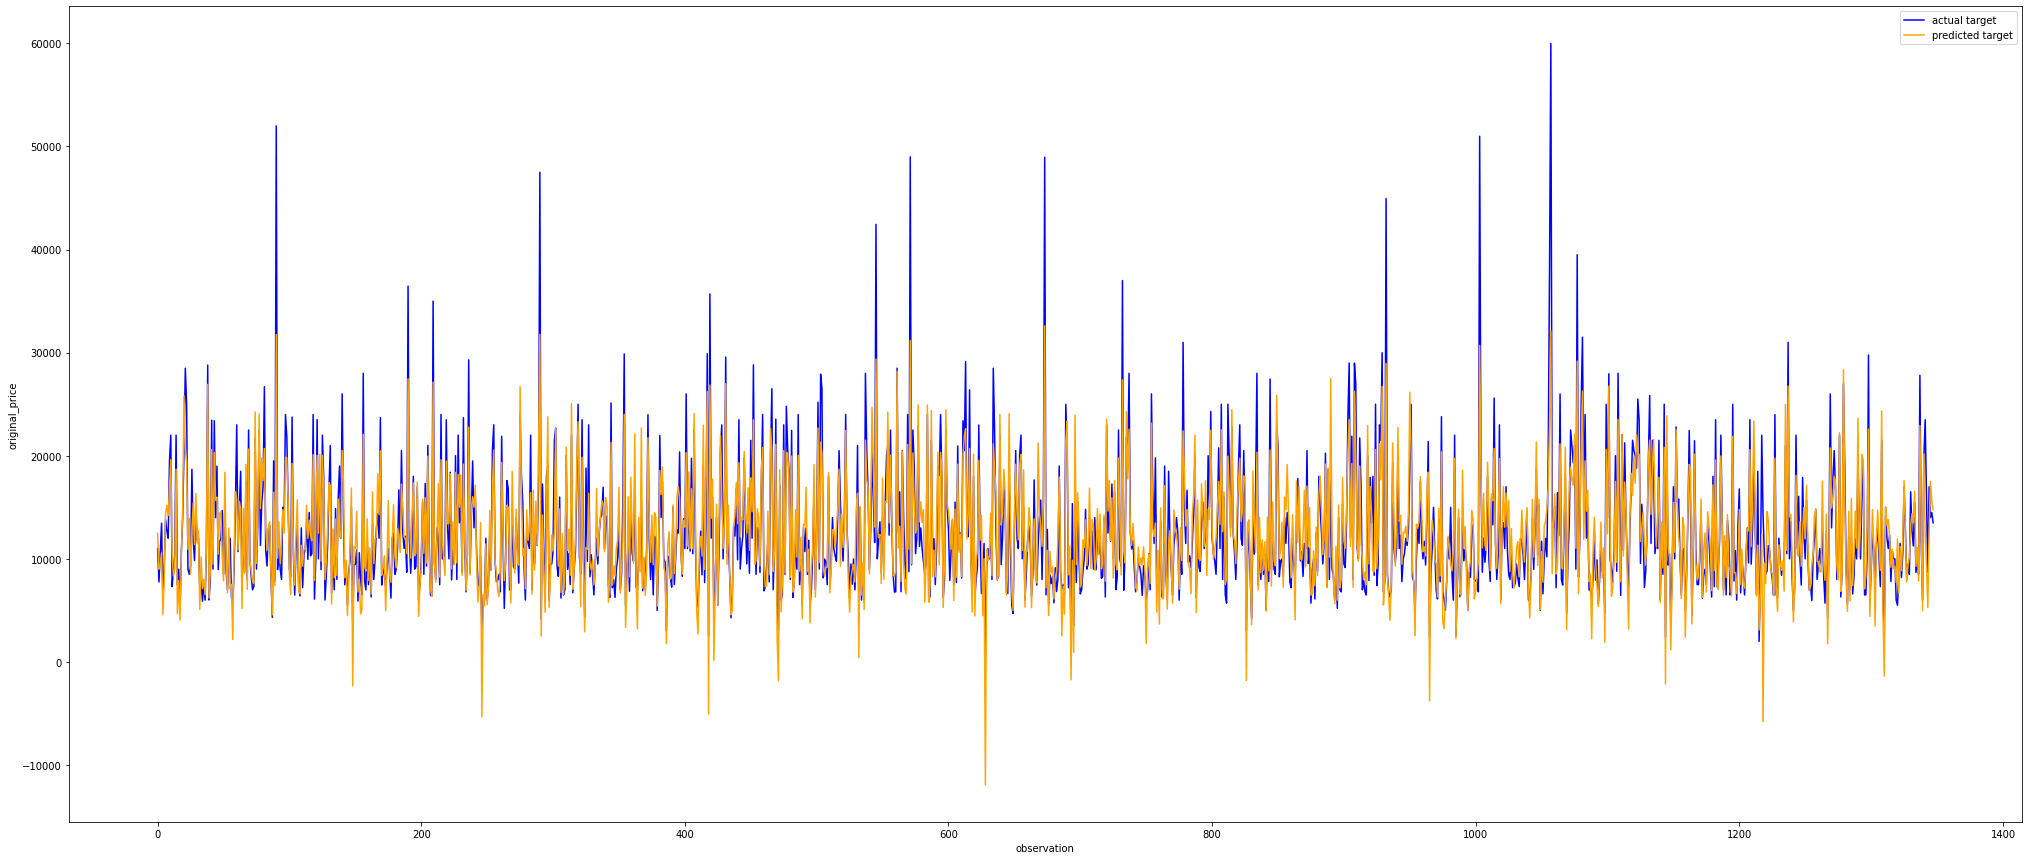

In [165]:
# y_test['pred'] = y_pred
# y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(35,15))

sns.lineplot(x='observation', y='original_price', data=df_predict, label='actual target', color = "blue")
sns.lineplot(x='observation', y='predicted_price', data=df_predict, label='predicted target', color = "orange")

# sns.lineplot(data=df_predict)
plt.show()

### Prediction Error

In [166]:
#Prediction error
# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute percentage error = ", MAE)

# mean absolute percentage error
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error = ", MAPE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

root mean squared error =  3108.078434638174
mean absolute percentage error =  2135.5829794000797
mean absolute percentage error =  0.19071301716074554
mean squared error =  9660151.555862881
coefficient of determination =  0.7751089509290106


##### Comment:

One Hot Encoding

root mean squared error =  1716.3162691449268

mean absolute percentage error =  1109.1454976758425

mean absolute percentage error =  0.10782823873138267

mean squared error =  2945741.5357315606

coefficient of determination =  0.9314223073590813


Label Encoding

root mean squared error =  3108.078434638174

mean absolute percentage error =  2135.5829794000797

mean absolute percentage error =  0.19071301716074554

mean squared error =  9660151.555862881

coefficient of determination =  0.7751089509290106



From the KPI, it is evident that one hot encoding is superior to label encoding.

### End of Homework 2 (Module 4)